# Statistical trigram

## Data preperation

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("./names.txt", 'r').read().splitlines()

In [3]:
words[:4]

['emma', 'olivia', 'ava', 'isabella']

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [5]:
two_chars = set()
for c1 in chars+["."]:
  for c2 in chars+["."]:
    two_chars.add(c1+c2)

two_chars = sorted(list(two_chars))

stoi2 = {s:i for i,s in enumerate(two_chars)}
itos2 = {i:s for i,s in enumerate(two_chars)}
# stoi2['.e'], itos2[449]

## Creating a probability distribution matrix

In [6]:
N = np.zeros((729, 27), dtype=np.float32)
    
# model smoothing
N += 1
    
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1,ch2,ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi2[ch1+ch2]
        ix2 = stoi[ch3]
        N[ix1, ix2] += 1

P = N
P /= P.sum(1, keepdims=True)
P=torch.from_numpy(P)

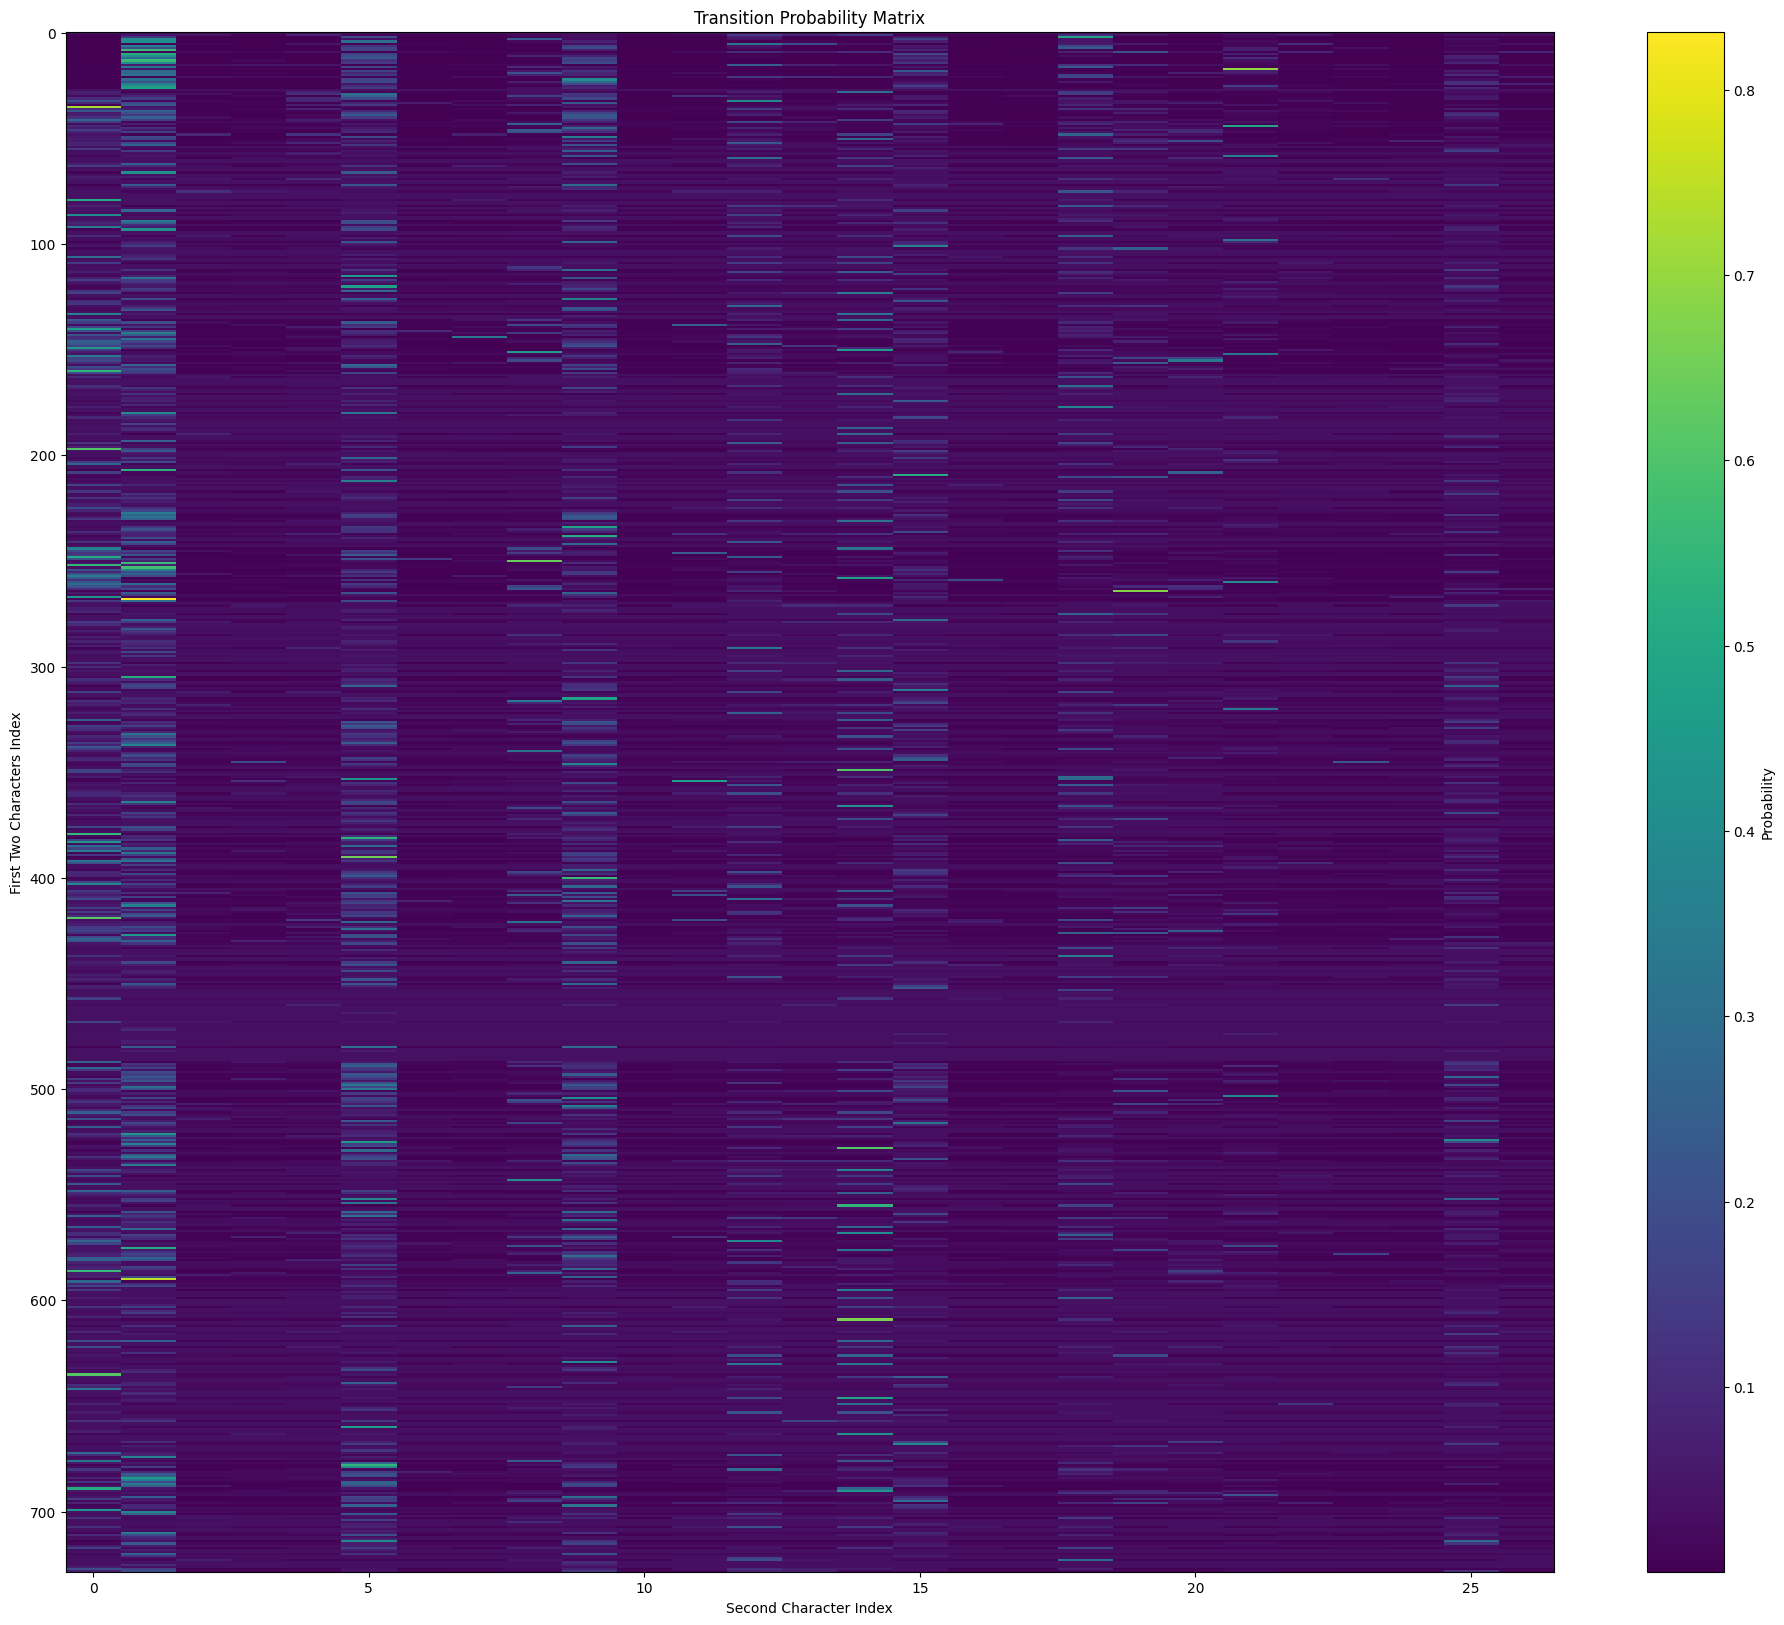

In [7]:
# Create a heatmap
plt.figure(figsize=(24, 20))
plt.imshow(P, cmap='viridis', aspect='auto', interpolation='nearest')

# Add colorbar for reference
cbar = plt.colorbar()
cbar.set_label('Probability')

# Set axis labels and title
plt.xlabel("Second Character Index")
plt.ylabel("First Two Characters Index")
plt.title("Transition Probability Matrix")

# Show the plot
plt.show()


## Sampling from the model

In [8]:
g = torch.Generator().manual_seed(2147483647)
for _ in range(50):
  ix = 1
  out = ["."]
  while True:
    if ix != 1:
      ix = stoi2[''.join(out[-2:])]
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, generator=g).item()
    out.append(itos[ix])
    if out[-1][-1] == ".":
      break
  
  print(''.join(out))

.luwjde.
.ilyasid.
.ulexay.
.adin.
.vairritoper.
.maree.
.viameiaurinileniassibduinrwin.
.lessiyanaylarte.
.unviumthyfortumj.
.nonn.
.lenarsani.
.rose.
.yae.
.rontadaabdinerimouis.
.yavi.
.anaasnhavi.
.monszxhddion.
.mandavic.
.le.
.nann.
.rhatin.
.norri.
.ish.
.ubri.
.mjeaurickivinayalevav.
.miarr.
.yen.
.nadortan.
.laylabel.
.hugi.
.lavadoni.
.zhamirayarath.
.bandam.
.leessitikiyaalee.
.mallen.
.lo.
.fabethellianten.
.naxteuralodridyden.
.nialiypvrgiaitazrwauriabiyah.
.elvavion.
.himah.
.urik.
.mil.
.norinobon.
.uli.
.naiyaxtenn.
.scadwfdadric.
.remyleessianner.
.sadoman.
.kyroderihanazzidab.


## Finding the average NLL with different dataset sizes 

In [9]:
combs = np.arange(300,30001,300)

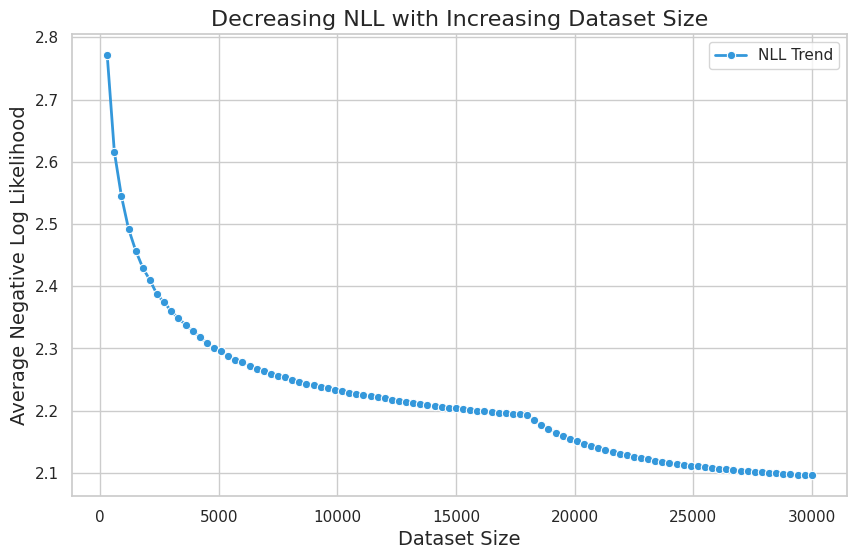

In [18]:
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create a larger figure 
plt.figure(figsize=(10, 6))

# Plot
sns.lineplot(x=list(avg_nll.keys()), y=list(avg_nll.values()), marker='o', color='#3498db', linewidth=2, label='NLL Trend')

plt.xlabel("Dataset Size", fontsize=14)
plt.ylabel("Average Negative Log Likelihood", fontsize=14)
plt.title("Decreasing NLL with Increasing Dataset Size", fontsize=16)

plt.legend()
plt.show()


In [10]:
avg_nll = {}
for comb in combs:
    N = np.zeros((729, 27), dtype=np.float32)
    
    # model smoothing
    N += 1
    
    for w in words[:comb]:
        chs = ["."] + list(w) + ["."]
        for ch1,ch2,ch3 in zip(chs, chs[1:], chs[2:]):
            ix1 = stoi2[ch1+ch2]
            ix2 = stoi[ch3]
            N[ix1, ix2] += 1

    P = N
    P /= P.sum(1, keepdims=True)
    n = 0
    log_likelihood = 0.0
    for w in words:
        chs = ["."] + list(w) + ["."]
        for ch1,ch2,ch3 in zip(chs, chs[1:], chs[2:]):
            ix1 = stoi2[ch1+ch2]
            ix2 = stoi[ch3]
            prob = P[ix1, ix2]
            logprob = np.log(prob)
            log_likelihood += logprob
            n += 1
    
    nll = -log_likelihood
    # print(f"{nll=}")
    # print(f"{nll/n=}")
    avg_nll[comb] = (nll/n)

## Optimal Model Smoothing

In [12]:
nums = np.arange(1, 11)
nums

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [13]:
smdl_nll = {}
for num in nums:
    N = torch.zeros((729, 27), dtype=torch.int32)
    N += num
    for w in words:
        chs = ["."] + list(w) + ["."]
        for ch1,ch2,ch3 in zip(chs, chs[1:], chs[2:]):
            ix1 = stoi2[ch1+ch2]
            ix2 = stoi[ch3]
            N[ix1, ix2] += 1
    P = N.float()
    P /= P.sum(1, keepdim=True)
    n = 0
    log_likelihood = 0.0
    for w in words:
        chs = ["."] + list(w) + ["."]
        for ch1,ch2,ch3 in zip(chs, chs[1:], chs[2:]):
            ix1 = stoi2[ch1+ch2]
            ix2 = stoi[ch3]
            prob = P[ix1, ix2]
            logprob = torch.log(prob)
            log_likelihood += logprob
            n += 1
    nll = -log_likelihood
    smdl_nll[num] = (nll/n).item()

In [14]:
smdl_nll

{1: 2.092747449874878,
 2: 2.115811586380005,
 3: 2.135310649871826,
 4: 2.1525962352752686,
 5: 2.1688427925109863,
 6: 2.1833159923553467,
 7: 2.1970198154449463,
 8: 2.2102863788604736,
 9: 2.222527265548706,
 10: 2.234072685241699}

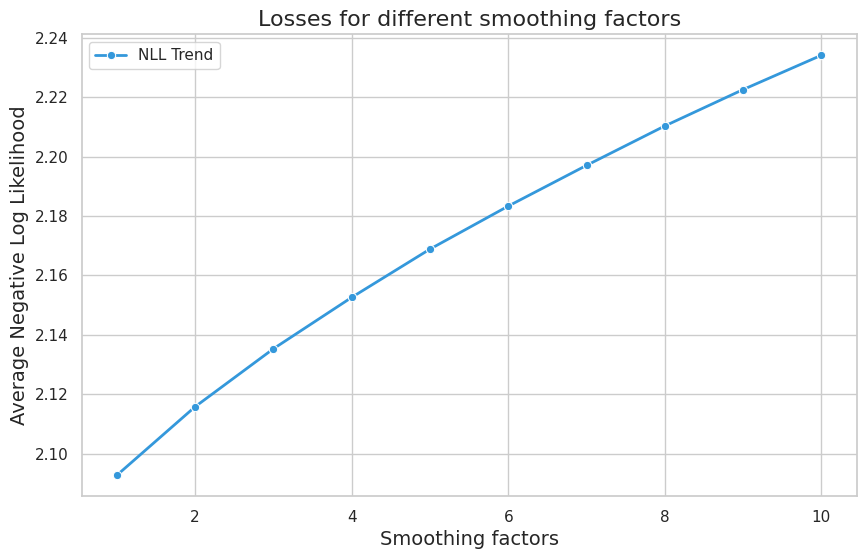

In [15]:
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create a larger figure for better clarity
plt.figure(figsize=(10, 6))

# Plot with a smooth line and distinctive color
sns.lineplot(x=list(smdl_nll.keys()), y=list(smdl_nll.values()), marker='o', color='#3498db', linewidth=2, label='NLL Trend')

plt.xlabel("Smoothing factors", fontsize=14)
plt.ylabel("Average Negative Log Likelihood", fontsize=14)
plt.title("Losses for different smoothing factors", fontsize=16)

plt.legend()
plt.show()